# Imports

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import bagging
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.model_selection import train_test_split

In [23]:
#importing data that is ready for processing

%store -r cdc

pd.set_option('display.max_columns', 500)

cdc.head()

,age,sex,race,martial,weight,height,overweight,education,income,home,employment,health,binge,coverage,checkup,primaryphysician,exercise,heavyalcohol,smoker,any_alcohol,sleep_avg,heart_dis,cancer,depression,stroke,diabete3,asthma3,heart_attack,skin_cancer,chronic_bronchitis,kidney_disease,arthritis,bmi,obese
0,80.0,2.0,1.0,3.0,130.0,64.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,22.312012,0
1,33.0,2.0,2.0,4.0,200.0,65.0,0.0,4.0,0.0,0.0,1.0,3.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.278107,1
2,76.0,2.0,1.0,3.0,142.0,58.0,0.0,2.0,0.0,1.0,0.5,5.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,7.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,29.674792,0
3,66.0,1.0,1.0,2.0,190.0,70.0,0.0,2.0,0.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.259184,0
5,80.0,2.0,1.0,3.0,172.0,62.0,0.0,3.0,99.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,31.455775,1


In [24]:
#a Subset of all the chronic conditions to create a feature that identifys individuals with 
#comorbidity(individuals with 2 or more chronic conditions)

subset = cdc[['heart_dis', 'cancer' , 'stroke', 'diabete3',  'heart_attack', 
             'chronic_bronchitis', 'kidney_disease', 'arthritis']]

#adding the values of each of the independent variable to identify participants with more than one chronic condition 
#after adding the values, if the sum was greater than two, the comorbid value will be assigned the value of one
cdc['comorbid'] = subset.sum(axis=1)
cdc['comorbid'] = np.where(cdc['comorbid']>=2, 1, 0)

In [25]:
cdc['chronic'] = subset.sum(axis=1)
cdc['chronic'] = np.where(cdc['chronic']>=1, 1, 0)

In [26]:
cdc.chronic.value_counts(normalize=True)

1    0.508575
0    0.491425
Name: chronic, dtype: float64

In [27]:
cdc.head()

,age,sex,race,martial,weight,height,overweight,education,income,home,employment,health,binge,coverage,checkup,primaryphysician,exercise,heavyalcohol,smoker,any_alcohol,sleep_avg,heart_dis,cancer,depression,stroke,diabete3,asthma3,heart_attack,skin_cancer,chronic_bronchitis,kidney_disease,arthritis,bmi,obese,comorbid,chronic
0,80.0,2.0,1.0,3.0,130.0,64.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,22.312012,0,0,1
1,33.0,2.0,2.0,4.0,200.0,65.0,0.0,4.0,0.0,0.0,1.0,3.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.278107,1,0,0
2,76.0,2.0,1.0,3.0,142.0,58.0,0.0,2.0,0.0,1.0,0.5,5.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,7.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,29.674792,0,1,1
3,66.0,1.0,1.0,2.0,190.0,70.0,0.0,2.0,0.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.259184,0,0,0
5,80.0,2.0,1.0,3.0,172.0,62.0,0.0,3.0,99.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,31.455775,1,1,1


In [28]:
cdc.columns

Index(['age', 'sex', 'race', 'martial', 'weight', 'height', 'overweight',
       'education', 'income', 'home', 'employment', 'health', 'binge',
       'coverage', 'checkup', 'primaryphysician', 'exercise', 'heavyalcohol',
       'smoker', 'any_alcohol', 'sleep_avg', 'heart_dis', 'cancer',
       'depression', 'stroke', 'diabete3', 'asthma3', 'heart_attack',
       'skin_cancer', 'chronic_bronchitis', 'kidney_disease', 'arthritis',
       'bmi', 'obese', 'comorbid', 'chronic'],
      dtype='object')

# Logistic Regression

In [29]:
#scaling data to put data points on a scale of zero to one
scaler = MinMaxScaler()
cdc_new = scaler.fit_transform(cdc)


In [30]:
cdc_new= pd.DataFrame(cdc_new)

cdc_new.round(2)
cdc_new.columns=cdc.columns

cdc_new.head()

,age,sex,race,martial,weight,height,overweight,education,income,home,employment,health,binge,coverage,checkup,primaryphysician,exercise,heavyalcohol,smoker,any_alcohol,sleep_avg,heart_dis,cancer,depression,stroke,diabete3,asthma3,heart_attack,skin_cancer,chronic_bronchitis,kidney_disease,arthritis,bmi,obese,comorbid,chronic
0,1.000000,1.0,0.0,0.666667,0.085763,0.422222,1.0,1.000000,0.010101,1.0,1.0,0.0,0.0,1.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.260870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.131337,0.0,0.0,1.0
1,0.241935,1.0,0.2,1.000000,0.205832,0.444444,0.0,1.000000,0.000000,0.0,1.0,0.5,0.0,0.0,0.333333,1.0,1.0,0.0,1.0,1.0,0.173913,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.231763,1.0,0.0,0.0
2,0.935484,1.0,0.0,0.666667,0.106346,0.288889,0.0,0.333333,0.000000,1.0,0.5,1.0,0.0,1.0,0.000000,1.0,1.0,0.0,0.0,0.0,0.260870,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.198764,0.0,1.0,1.0
3,0.774194,0.0,0.0,0.333333,0.188679,0.555556,0.0,0.333333,0.000000,1.0,0.5,0.0,0.0,1.0,0.000000,1.0,1.0,0.0,0.0,0.0,0.217391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.176642,0.0,0.0,0.0
4,1.000000,1.0,0.0,0.666667,0.157804,0.377778,0.0,0.666667,1.000000,1.0,0.5,0.0,0.0,1.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.217391,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.215074,1.0,1.0,1.0


In [31]:
%store cdc_new

Stored 'cdc_new' (DataFrame)


In [32]:
#selecting the target and independent variables

#independent variables
X = cdc_new.drop(['chronic', 'heart_dis', 'cancer', 'stroke', 'diabete3', 'asthma3',
              'heart_attack', 'skin_cancer', 'chronic_bronchitis', 'kidney_disease', 
              'arthritis', 'comorbid', 'arthritis', 'depression',
               
             'heavyalcohol', 'income', 'race', 'height', 'binge', 'coverage', 'martial',
                  'overweight', 'obese', 'education', 'home'
              
            
              ], axis=1)
#'heart_attack'
#target variable
y = cdc_new.chronic
X.head()

,age,sex,weight,employment,health,checkup,primaryphysician,exercise,smoker,any_alcohol,sleep_avg,bmi
0,1.000000,1.0,0.085763,1.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.260870,0.131337
1,0.241935,1.0,0.205832,1.0,0.5,0.333333,1.0,1.0,1.0,1.0,0.173913,0.231763
2,0.935484,1.0,0.106346,0.5,1.0,0.000000,1.0,1.0,0.0,0.0,0.260870,0.198764
3,0.774194,0.0,0.188679,0.5,0.0,0.000000,1.0,1.0,0.0,0.0,0.217391,0.176642
4,1.000000,1.0,0.157804,0.5,0.0,0.000000,1.0,0.0,0.0,0.0,0.217391,0.215074


In [33]:
#Spliting data in to training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)


#instantiating logistic regression model

log_reg = LogisticRegression()

#fiting logistic regression to training data

log_model = log_reg.fit(X_train, y_train)

In [34]:
#acuracy score for the logistic regression model

log_model.score(X_train, y_train)

0.7647493098799512

In [35]:
#coefficients of the model

coef = log_model.coef_.flatten()

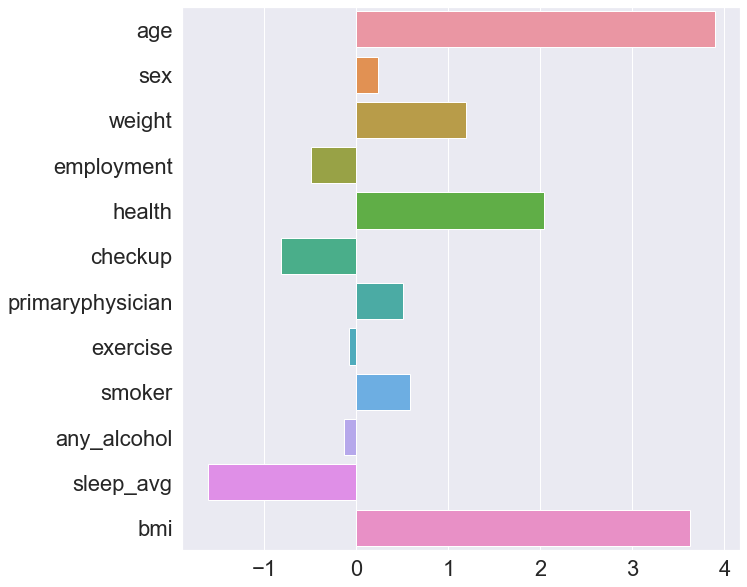

In [36]:
#Plotting a barplot to visualize coefficients of the regression model and their importance

plt.figure(figsize=(10,10))
sns.barplot(coef, X_train.columns)

# A negative coefficient suggests that as the independent variable increases,
# the dependent variable tends to decrease. 

In [37]:
#importing confusion matrix and crossvalidation

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_validate, KFold
from sklearn.model_selection import cross_val_score

In [38]:
print(cross_val_score(log_model, X_train, y_train, scoring='accuracy', cv = 3).mean()*100)


76.48456088177481


In [39]:
pred = log_model.predict(X_test)

#Confusion matrix and classification report
log_confusion = confusion_matrix(y_test, pred, normalize='true')
class_report = classification_report(y_test, pred)
print(log_confusion)
print(class_report)

[[0.74741418 0.25258582]
 [0.2137495  0.7862505 ]]
              precision    recall  f1-score   support

         0.0       0.77      0.75      0.76     38189
         1.0       0.76      0.79      0.77     39696

    accuracy                           0.77     77885
   macro avg       0.77      0.77      0.77     77885
weighted avg       0.77      0.77      0.77     77885



In [40]:
log_classes = log_model.classes_

In [41]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (11,7), fontsize=19):
    
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
    fig = plt.figure(figsize=figsize )
    try:
        heatmap = sns.heatmap(df_cm, annot=True, cmap='YlGnBu')
        sns.set(font_scale=2)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    
    plt.ylabel('True label', fontsize=13)
    plt.xlabel('Predicted label', fontsize=13)
    
    return fig

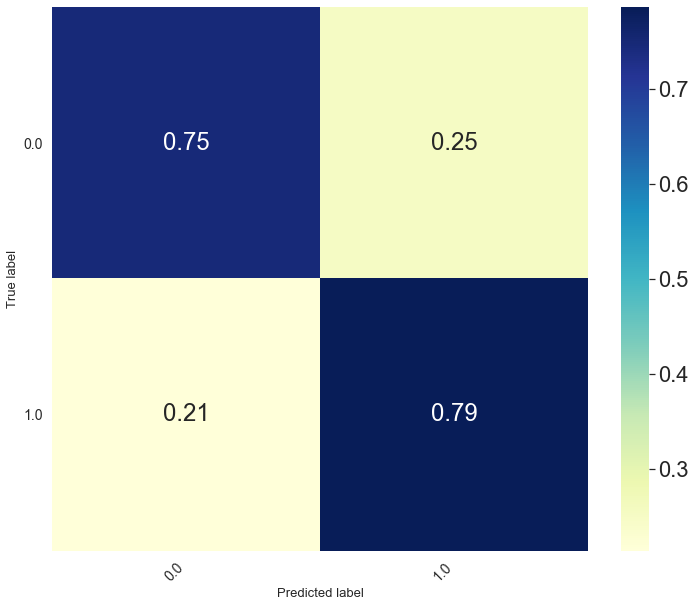

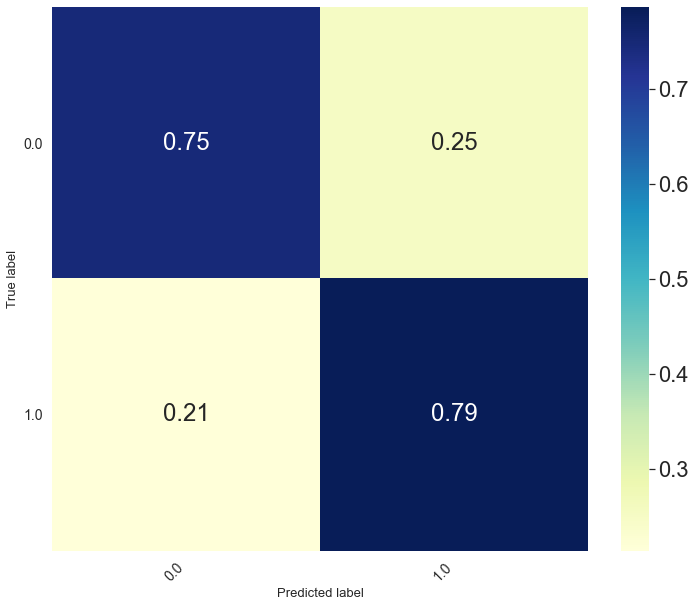

In [42]:
print_confusion_matrix(log_confusion, log_classes, figsize =(12,10), fontsize=14)

#true positive = 5244  false positive = 4946
#false negativ = 2601   True negative = 14435

# Mean Shift Clustering 

In [364]:
# from sklearn.cluster import MeanShift
# from mpl_toolkits.mplot3d import Axes3D

In [365]:
from sklearn.cluster import KMeans

In [366]:
k_means = KMeans(n_clusters = 4)
k_means.fit(X_train)
y_hat = k_means.predict(X_train)
labels = k_means.labels_

In [367]:
# from sklearn import metrics
# labels = k_means.labels_

# metrics.silhouette_score(X_train, labels, metric='euclidean')

In [368]:
X_train['y_hat'] = y_hat


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


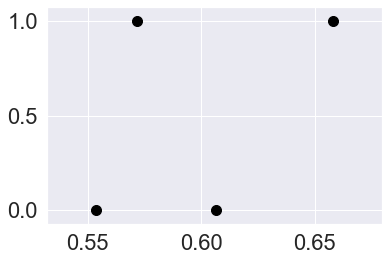

In [369]:
# plt.scatter(X_train[:, 0], X_train[:, 1], c = y_hat, s = 25)
cl_centers = k_means.cluster_centers_

plt.scatter(cl_centers[:, 0], cl_centers[:, 1], c='black', s=100);

In [370]:
X_train.head()

,age,sex,weight,employment,health,checkup,primaryphysician,exercise,smoker,any_alcohol,sleep_avg,bmi,y_hat
128177,0.516129,0.0,0.290493,1.0,0.0,0.000000,1.0,1.0,0.5,1.0,0.217391,0.321188,1
164826,0.629032,1.0,0.167254,0.0,1.0,0.333333,1.0,1.0,1.0,0.0,0.173913,0.245509,0
260069,0.241935,0.0,0.264085,1.0,0.0,0.000000,1.0,1.0,0.0,0.0,0.130435,0.256013,3
41713,0.725806,1.0,0.140845,1.0,0.0,0.000000,1.0,1.0,0.0,1.0,0.347826,0.170268,2
98589,0.548387,0.0,0.272887,1.0,0.5,1.000000,1.0,1.0,0.0,1.0,0.217391,0.242120,1


In [371]:
group_0 = X_train.loc[y_hat==0]
group_0.describe()

,age,sex,weight,employment,health,checkup,primaryphysician,exercise,smoker,any_alcohol,sleep_avg,bmi,y_hat
count,84525.000000,84525.0,84525.000000,84525.000000,84525.000000,84525.000000,84525.000000,84525.000000,84525.000000,84525.0,84525.000000,84525.000000,84525.0
mean,0.658082,1.0,0.155390,0.529784,0.385173,0.076534,0.888400,0.658622,0.249808,0.0,0.263466,0.196478,0.0
std,0.273025,0.0,0.077407,0.398042,0.344337,0.215364,0.314876,0.474175,0.361279,0.0,0.071104,0.084037,0.0
min,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,0.483871,1.0,0.102113,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.217391,0.136995,0.0
50%,0.709677,1.0,0.140845,0.500000,0.500000,0.000000,1.000000,1.000000,0.000000,0.0,0.260870,0.180064,0.0
75%,0.887097,1.0,0.193662,1.000000,0.750000,0.000000,1.000000,1.000000,0.500000,0.0,0.304348,0.240222,0.0
max,1.000000,1.0,0.915493,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.916119,0.0


In [372]:
group_1 = X_train.loc[y_hat==1]
group_1.describe()

,age,sex,weight,employment,health,checkup,primaryphysician,exercise,smoker,any_alcohol,sleep_avg,bmi,y_hat
count,86066.000000,86066.0,86066.000000,86066.000000,86066.000000,86066.000000,86066.000000,86066.000000,86066.000000,86066.0,86066.000000,86066.000000,86066.0
mean,0.553871,0.0,0.208535,0.767417,0.264225,0.149955,0.777636,0.823682,0.329340,1.0,0.259923,0.188844,1.0
std,0.278093,0.0,0.071857,0.339622,0.309956,0.297241,0.415837,0.381093,0.372317,0.0,0.058917,0.062118,0.0
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000213,1.0
25%,0.322581,0.0,0.158451,0.500000,0.000000,0.000000,1.000000,1.000000,0.000000,1.0,0.217391,0.146177,1.0
50%,0.580645,0.0,0.197183,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.0,0.260870,0.178954,1.0
75%,0.774194,0.0,0.246479,1.000000,0.500000,0.000000,1.000000,1.000000,0.500000,1.0,0.304348,0.219613,1.0
max,1.000000,0.0,0.774648,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,0.845079,1.0
